<div>
<img src='http://www-scf.usc.edu/~ghasemig/images/sharif.png' alt="SUT logo" width=220 height=220 align=left class="saturate">

<br>
<font face="Times New Roman">
<div dir=ltr align=center> 
<!-- <font color=0F5298 size=7> -->
<font color=0F5298 size=6>
    Introduction to Machine Learning <br> <br>
<!-- <font color=2565AE size=5> -->
<font size=5>
    Computer Engineering Department <br>
    Spring 2023 <br> <br>
<font color=606060 size=5>
    Homework 1: Practical - Linear Regression <br> <br>
<font color=686880 size=4>
    TAs: Arman Malekzadeh - Yalda Shabanzadeh - Arshia Soltani Moakhar
    
____

### Full Name : Mehdi Lotfian
### Student Number : 99105689
___

In [1]:
# run this to download the dataset
!wget -O 'dataset.csv' https://www.dropbox.com/s/2ny75tb1ic141yw/assignment1.csv?dl=0

--2023-03-10 19:53:35--  https://www.dropbox.com/s/2ny75tb1ic141yw/assignment1.csv?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.3.18, 2620:100:6018:18::a27d:312
Connecting to www.dropbox.com (www.dropbox.com)|162.125.3.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /s/raw/2ny75tb1ic141yw/assignment1.csv [following]
--2023-03-10 19:53:36--  https://www.dropbox.com/s/raw/2ny75tb1ic141yw/assignment1.csv
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc12496ab4c1079230e8b47c82e0.dl.dropboxusercontent.com/cd/0/inline/B38XitjFu06K9Wv4XZQosxRJ75puBYj70rZOXC7NV7ycxwqvB_D6xTBji38uP1ARLZZVB7vp6Y7Cn186eL0fT770f5QxJHVFVAnYAXxk6doh3eixKItWWggN-VAlpV-0bk1Fomv8hTwK0GfJS14Qlcr0g60WFZVDBcb3oRqU7rLacQ/file# [following]
--2023-03-10 19:53:36--  https://uc12496ab4c1079230e8b47c82e0.dl.dropboxusercontent.com/cd/0/inline/B38XitjFu06K9Wv4XZQosxRJ75puBYj70rZOXC7NV7ycxwqvB_D6xTBji38uP1ARLZ

In [2]:
# you can use the following libraries
import pandas as pd
import sklearn
import numpy as np
from joblib import dump, load
from matplotlib import pyplot as plt
import os

# Phase 1: Explore

## Sec 1: What do we have here?

load the dataset (as a dataframe) using pandas

In [3]:
my_dataset = pd.read_csv("dataset.csv")

display the top rows of the dataframe (top 5 is enough)

In [4]:
my_dataset.head(5)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


print the names of the columns

In [5]:
print(my_dataset.columns.values)

['age' 'sex' 'bmi' 'children' 'smoker' 'region' 'charges']


what values can the `region` column take? print the unique values using pandas

In [6]:
print(my_dataset['region'].unique())

['southwest' 'southeast' 'northwest' 'northeast']


get the number of rows in the dataset

In [7]:
len(my_dataset)

1338

make a new column named `rounded_bmi` by rounding each value of the column `bmi` | keep the `bmi` column

In [8]:
my_dataset['rounded_bmi'] = [round(i) for i in my_dataset['bmi']]
my_dataset

,age,sex,bmi,children,smoker,region,charges,rounded_bmi
0,19,female,27.900,0,yes,southwest,16884.92400,28
1,18,male,33.770,1,no,southeast,1725.55230,34
2,28,male,33.000,3,no,southeast,4449.46200,33
3,33,male,22.705,0,no,northwest,21984.47061,23
4,32,male,28.880,0,no,northwest,3866.85520,29
...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,31
1334,18,female,31.920,0,no,northeast,2205.98080,32
1335,18,female,36.850,0,no,southeast,1629.83350,37
1336,21,female,25.800,0,no,southwest,2007.94500,26


## Sec 2: Perform EDA

perform EDA on the dataset (e.g., see if there are null values)

### overview: columns informations

In [9]:
my_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          1338 non-null   int64  
 1   sex          1338 non-null   object 
 2   bmi          1338 non-null   float64
 3   children     1338 non-null   int64  
 4   smoker       1338 non-null   object 
 5   region       1338 non-null   object 
 6   charges      1338 non-null   float64
 7   rounded_bmi  1338 non-null   int64  
dtypes: float64(2), int64(3), object(3)
memory usage: 83.8+ KB


### overview: statistical description

In [10]:
my_dataset.describe()

,age,bmi,children,charges,rounded_bmi
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265,30.663677
std,14.049960,6.098187,1.205493,12110.011237,6.096007
min,18.000000,15.960000,0.000000,1121.873900,16.000000
25%,27.000000,26.296250,0.000000,4740.287150,26.000000
50%,39.000000,30.400000,1.000000,9382.033000,30.000000
75%,51.000000,34.693750,2.000000,16639.912515,35.000000
max,64.000000,53.130000,5.000000,63770.428010,53.000000


### find and remove duplicates

In [11]:
my_dataset.duplicated().sum()

1

In [12]:
my_dataset = my_dataset.drop_duplicates()

In [13]:
my_dataset.duplicated().sum()

0

### unique values in data

In [14]:
for column in my_dataset.columns.values:
  print(column)
  print(my_dataset[column].unique())

age
[19 18 28 33 32 31 46 37 60 25 62 23 56 27 52 30 34 59 63 55 22 26 35 24
 41 38 36 21 48 40 58 53 43 64 20 61 44 57 29 45 54 49 47 51 42 50 39]
sex
['female' 'male']
bmi
[27.9   33.77  33.    22.705 28.88  25.74  33.44  27.74  29.83  25.84
 26.22  26.29  34.4   39.82  42.13  24.6   30.78  23.845 40.3   35.3
 36.005 32.4   34.1   31.92  28.025 27.72  23.085 32.775 17.385 36.3
 35.6   26.315 28.6   28.31  36.4   20.425 32.965 20.8   36.67  39.9
 26.6   36.63  21.78  30.8   37.05  37.3   38.665 34.77  24.53  35.2
 35.625 33.63  28.    34.43  28.69  36.955 31.825 31.68  22.88  37.335
 27.36  33.66  24.7   25.935 22.42  28.9   39.1   36.19  23.98  24.75
 28.5   28.1   32.01  27.4   34.01  29.59  35.53  39.805 26.885 38.285
 37.62  41.23  34.8   22.895 31.16  27.2   26.98  39.49  24.795 31.3
 38.28  19.95  19.3   31.6   25.46  30.115 29.92  27.5   28.4   30.875
 27.94  35.09  29.7   35.72  32.205 28.595 49.06  27.17  23.37  37.1
 23.75  28.975 31.35  33.915 28.785 28.3   37.4   17.765 34

### visualize values redundency 

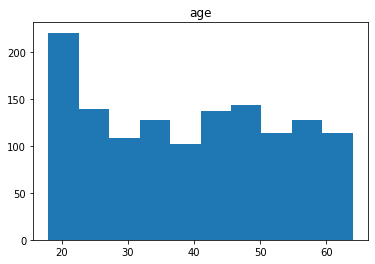

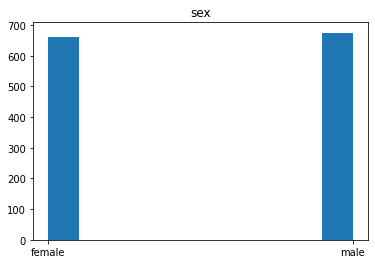

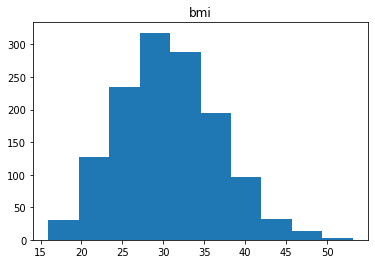

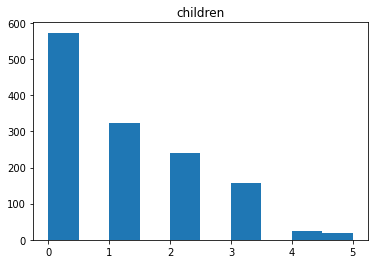

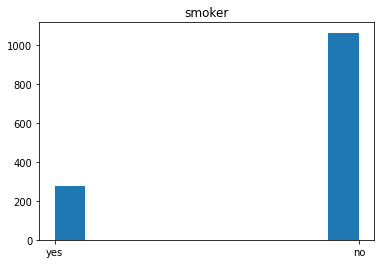

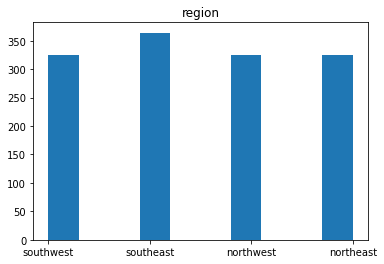

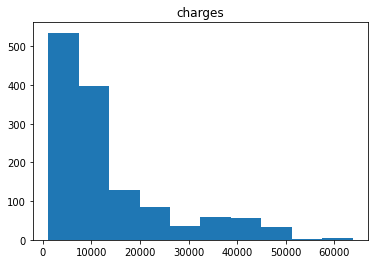

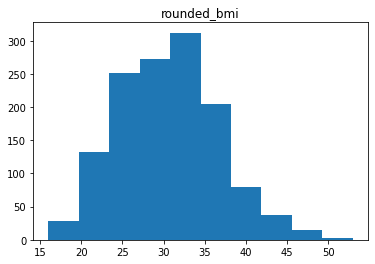

In [15]:
for column in my_dataset.columns.values:
  plt.title(column)
  plt.hist(my_dataset[column])
  plt.show()

### find null values

In [16]:
my_dataset.isnull().sum()

age            0
sex            0
bmi            0
children       0
smoker         0
region         0
charges        0
rounded_bmi    0
dtype: int64

### find out the data types

In [17]:
my_dataset.dtypes

age              int64
sex             object
bmi            float64
children         int64
smoker          object
region          object
charges        float64
rounded_bmi      int64
dtype: object

### correlation between columns

In [18]:
my_dataset.corr()

,age,bmi,children,charges,rounded_bmi
age,1.000000,0.109344,0.041536,0.298308,0.109671
bmi,0.109344,1.000000,0.012755,0.198401,0.998922
children,0.041536,0.012755,1.000000,0.067389,0.013956
charges,0.298308,0.198401,0.067389,1.000000,0.198904
rounded_bmi,0.109671,0.998922,0.013956,0.198904,1.000000


In [19]:
import seaborn as sns

<AxesSubplot:>

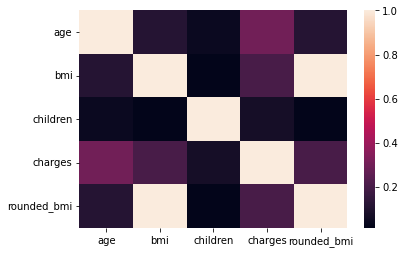

In [20]:
sns.heatmap(my_dataset.corr())

## Sec 3: Do linear relationships exist?

plot `age` against `charges` | **hint**: you can use matplotlibs

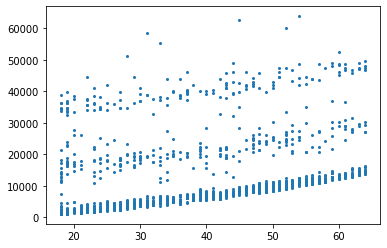

In [21]:
plt.scatter(my_dataset['age'], my_dataset['charges'], s=4)
plt.show()

print the correlation coefficients matrix

In [22]:
my_dataset.corr()

,age,bmi,children,charges,rounded_bmi
age,1.000000,0.109344,0.041536,0.298308,0.109671
bmi,0.109344,1.000000,0.012755,0.198401,0.998922
children,0.041536,0.012755,1.000000,0.067389,0.013956
charges,0.298308,0.198401,0.067389,1.000000,0.198904
rounded_bmi,0.109671,0.998922,0.013956,0.198904,1.000000


# Phase 2: Preprocessing

## Sec 1: Handling Categorical Variables

using one-hot encoding, convert the `region` variable to some numerical variables (the result should be a dataframe)

In [23]:
one_hot_region = pd.get_dummies(my_dataset, prefix='region', columns=['region'])
one_hot_region

,age,sex,bmi,children,smoker,charges,rounded_bmi,region_northeast,region_northwest,region_southeast,region_southwest
0,19,female,27.900,0,yes,16884.92400,28,0,0,0,1
1,18,male,33.770,1,no,1725.55230,34,0,0,1,0
2,28,male,33.000,3,no,4449.46200,33,0,0,1,0
3,33,male,22.705,0,no,21984.47061,23,0,1,0,0
4,32,male,28.880,0,no,3866.85520,29,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,10600.54830,31,0,1,0,0
1334,18,female,31.920,0,no,2205.98080,32,1,0,0,0
1335,18,female,36.850,0,no,1629.83350,37,0,0,1,0
1336,21,female,25.800,0,no,2007.94500,26,0,0,0,1


do the same thing for the `smoker` variable (the result should be a dataframe)

In [24]:
one_hot_smoker = pd.get_dummies(my_dataset, prefix='smoker', columns=['smoker'])
one_hot_smoker

,age,sex,bmi,children,region,charges,rounded_bmi,smoker_no,smoker_yes
0,19,female,27.900,0,southwest,16884.92400,28,0,1
1,18,male,33.770,1,southeast,1725.55230,34,1,0
2,28,male,33.000,3,southeast,4449.46200,33,1,0
3,33,male,22.705,0,northwest,21984.47061,23,1,0
4,32,male,28.880,0,northwest,3866.85520,29,1,0
...,...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,northwest,10600.54830,31,1,0
1334,18,female,31.920,0,northeast,2205.98080,32,1,0
1335,18,female,36.850,0,southeast,1629.83350,37,1,0
1336,21,female,25.800,0,southwest,2007.94500,26,1,0


do the same thing for the `sex` variable (the result should be a dataframe)

In [25]:
one_hot_sex = pd.get_dummies(my_dataset, prefix='sex', columns=['sex'])
one_hot_sex

,age,bmi,children,smoker,region,charges,rounded_bmi,sex_female,sex_male
0,19,27.900,0,yes,southwest,16884.92400,28,1,0
1,18,33.770,1,no,southeast,1725.55230,34,0,1
2,28,33.000,3,no,southeast,4449.46200,33,0,1
3,33,22.705,0,no,northwest,21984.47061,23,0,1
4,32,28.880,0,no,northwest,3866.85520,29,0,1
...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,no,northwest,10600.54830,31,0,1
1334,18,31.920,0,no,northeast,2205.98080,32,1,0
1335,18,36.850,0,no,southeast,1629.83350,37,1,0
1336,21,25.800,0,no,southwest,2007.94500,26,1,0


concatenate these new dataframes with the initial one using pandas

In [26]:
frames = [my_dataset, one_hot_region, one_hot_smoker, one_hot_sex]
one_hot_dataset = pd.merge(my_dataset, 
                           pd.merge(one_hot_region, 
                                    pd.merge(one_hot_smoker, one_hot_sex)))
one_hot_dataset = one_hot_dataset.drop(
    labels=['region', 'smoker', 'sex'], axis='columns')
one_hot_dataset

,age,bmi,children,charges,rounded_bmi,region_northeast,region_northwest,region_southeast,region_southwest,smoker_no,smoker_yes,sex_female,sex_male
0,19,27.900,0,16884.92400,28,0,0,0,1,0,1,1,0
1,18,33.770,1,1725.55230,34,0,0,1,0,1,0,0,1
2,28,33.000,3,4449.46200,33,0,0,1,0,1,0,0,1
3,33,22.705,0,21984.47061,23,0,1,0,0,1,0,0,1
4,32,28.880,0,3866.85520,29,0,1,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1332,50,30.970,3,10600.54830,31,0,1,0,0,1,0,0,1
1333,18,31.920,0,2205.98080,32,1,0,0,0,1,0,1,0
1334,18,36.850,0,1629.83350,37,0,0,1,0,1,0,1,0
1335,21,25.800,0,2007.94500,26,0,0,0,1,1,0,1,0


## Sec 2: Normalization

normalize the columns `age`, `bmi`, and `children` | after this, they should take values between 0 and 1

In [27]:
normalized_dataset = one_hot_dataset.copy()
for column in normalized_dataset.columns:
  if column in ['age', 'bmi', 'children']:
    normalized_dataset[column] = (
        normalized_dataset[column] - normalized_dataset[column].min()) / (
            normalized_dataset[column].max() - normalized_dataset[column].min())
normalized_dataset

,age,bmi,children,charges,rounded_bmi,region_northeast,region_northwest,region_southeast,region_southwest,smoker_no,smoker_yes,sex_female,sex_male
0,0.021739,0.321227,0.0,16884.92400,28,0,0,0,1,0,1,1,0
1,0.000000,0.479150,0.2,1725.55230,34,0,0,1,0,1,0,0,1
2,0.217391,0.458434,0.6,4449.46200,33,0,0,1,0,1,0,0,1
3,0.326087,0.181464,0.0,21984.47061,23,0,1,0,0,1,0,0,1
4,0.304348,0.347592,0.0,3866.85520,29,0,1,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1332,0.695652,0.403820,0.6,10600.54830,31,0,1,0,0,1,0,0,1
1333,0.000000,0.429379,0.0,2205.98080,32,1,0,0,0,1,0,1,0
1334,0.000000,0.562012,0.0,1629.83350,37,0,0,1,0,1,0,1,0
1335,0.065217,0.264730,0.0,2007.94500,26,0,0,0,1,1,0,1,0


I normalized the data between 0 and 1 with min-max feature scaling.

# Phase 3: Training

## Sec 1: Making X and Y

make a new dataframe by removing the following columns: "rounded_bmi", "charges" 
| note: do not remove the previous dataframe

In [28]:
features_dataset = normalized_dataset.drop(
    labels=['rounded_bmi', 'charges'], axis='columns')
features_dataset

,age,bmi,children,region_northeast,region_northwest,region_southeast,region_southwest,smoker_no,smoker_yes,sex_female,sex_male
0,0.021739,0.321227,0.0,0,0,0,1,0,1,1,0
1,0.000000,0.479150,0.2,0,0,1,0,1,0,0,1
2,0.217391,0.458434,0.6,0,0,1,0,1,0,0,1
3,0.326087,0.181464,0.0,0,1,0,0,1,0,0,1
4,0.304348,0.347592,0.0,0,1,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
1332,0.695652,0.403820,0.6,0,1,0,0,1,0,0,1
1333,0.000000,0.429379,0.0,1,0,0,0,1,0,1,0
1334,0.000000,0.562012,0.0,0,0,1,0,1,0,1,0
1335,0.065217,0.264730,0.0,0,0,0,1,1,0,1,0


convert the new dataframe into a numpy array named "x"

In [29]:
x = features_dataset.to_numpy()
x

array([[0.02173913, 0.3212268 , 0.        , ..., 1.        , 1.        ,
        0.        ],
       [0.        , 0.47914985, 0.2       , ..., 0.        , 0.        ,
        1.        ],
       [0.2173913 , 0.45843422, 0.6       , ..., 0.        , 0.        ,
        1.        ],
       ...,
       [0.        , 0.56201238, 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.06521739, 0.26472962, 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.93478261, 0.35270379, 0.        , ..., 1.        , 1.        ,
        0.        ]])

get the "charges" column from the previous dataframe and convert it to another numpy array named "y"

In [30]:
y = normalized_dataset['charges'].to_numpy()
y

array([16884.924 ,  1725.5523,  4449.462 , ...,  1629.8335,  2007.945 ,
       29141.3603])

## Sec 2: Splitting the Data

divide the dataset into two portions in a way that 90% of the data belongs to the "training" set (called `x_train`, `y_train`) and the remaining belongs to the "testing" set (called `x_test`, `y_test`)

In [31]:
from sklearn.model_selection import train_test_split

In [32]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=1)

We could also do this using pandas sample funcion or numpy split function.

## Sec 3 (Optional): Linear Regression from Scratch

Complete this section with your code.

**hint**: 
- use pseudo inverse if matrix is not invertible.
- you can use `np.linalg`.

**note**:
- do **Phase 3:Sec 4** and **Phase 4:all sections** with this model also, then compare your results. 

In [33]:
class LinearRegression:
    """
    Fits it on data, then use predict to get results.
    """

    def __init__(self):
        self.weights = np.array(None)
        self.bias = np.array(None)
    
    def fit(self, X, y):
        """Fit the training data
        Parameters
        ----------
        x : array-like, shape = [n_samples, n_features]
            Training samples
        y : array-like, shape = [n_samples, n_target_values]
            Target values
        Returns
        -------
        self : object
        """

        n_samples, n_features = X.shape
        """
        YOUR CODE
        """
        X = np.c_[np.ones(len(X)), X]
        weights_bias = np.dot(np.linalg.pinv(np.dot(X.T, X)), np.dot(X.T, y))
        self.weights = weights_bias[1:]
        self.bias = weights_bias[0]
        return self
    
    def predict(self, X):
        """ Predicts the value after the model has been trained.
        Parameters
        ----------
        x : array-like, shape = [n_samples, n_features]
            Test samples
        Returns
        -------
        Predicted value
        """
        
        y_pred = None
        """
        YOUR CODE
        """
        y_pred = np.dot(X, self.weights) + self.bias
        return y_pred

    def coef_(self):
      return self.weights

    def intercept(self):
      return self.bias

## Sec 4: The real deal!

fit a linear regressor to the data. (Use both regressors - sklearn & from scratch - if you did previous part)

In [34]:
from sklearn import linear_model as lm

### sklearn

In [35]:
lr = lm.LinearRegression().fit(x_train, y_train)

### from scratch

In [36]:
lr_scratch = LinearRegression().fit(x_train, y_train)

get the coefficients of the variables

### sklearn

In [37]:
lr.coef_

array([ 1.18753817e+04,  1.27744070e+04,  2.45675208e+03,  3.02602670e+15,
        3.02602670e+15,  3.02602670e+15,  3.02602670e+15, -3.85625455e+17,
       -3.85625455e+17,  3.30081922e+16,  3.30081922e+16])

### from scratch

In [38]:
lr_scratch.coef_()

array([11862.58951285, 13111.23043644,  2589.56741928,  1550.34937616,
        1258.76098834,   546.30334824,   674.29678972, -9888.24549619,
       13917.95599866,  2194.68039223,  1835.03011024])

get the bias value associated with the model

### sklearn

In [39]:
lr.intercept_

3.4959123651635904e+17

### from scratch

In [40]:
lr_scratch.intercept()

4029.7105024667526

## Sec 5: Save/Load the model

Save

In [41]:
import pickle

In [42]:
file_name = 'best_model'
pickle.dump(lr, open(file_name, 'wb'))

Load

In [43]:
loaded_lr = pickle.load(open(file_name, 'rb'))

# Phase 4: Evaluation

predict the value of "y" for each "x" belonging to the "testing" set

### sklearn

In [44]:
y_pred = loaded_lr.predict(x_test)
y_pred

array([35904., 12864., 13760., 11456., 11136.,  2432.,  4736., 12352.,
       10304., 34432., 10880.,  5248., 10880.,  9152.,  3136., 13632.,
        3584., 32128., 15744., 16000.,  6080., 17856.,  9024.,  9920.,
        6784., 35392.,  9600., 39872.,  5952.,  4096., 15296.,  4096.,
        4352., 10752.,  2432.,  4480., 30080., 11328., 11904., 10816.,
       34432.,  -128., 10944., 33472., 17280., 12928., 14784.,  4096.,
        6976.,  9536., 13248., 12416., 11136., 12352.,  9280.,   896.,
        3200., 14080.,  5696., 15104., 13248., 15872.,  2752.,  3968.,
        5952.,  6592.,  5824., 35584., 11968., 11008., 33472.,  1472.,
        1792.,  -704., 13184.,  1024., 10368.,  3776.,  5120.,  3840.,
       13440., 12480., 10240., 10496., 36672.,  3008., 24768.,  3136.,
       34816., 10112.,  9664.,  7680.,  6784., 11008.,  4992., 10176.,
       11904., 19200.,  1856.,  7296., 13696., 26240.,  8320., 27072.,
        7552., 11328., 12288., 15744., 13056.,  -128., 11008.,  4992.,
      

### from scratch

In [45]:
y_pred_scratch = lr_scratch.predict(x_test)
y_pred_scratch

array([36215.47102681, 12788.30979747, 13743.28723607, 11412.70014281,
       11025.5998019 ,  2338.96184659,  4665.11937115, 12299.37382261,
       10199.07962618, 34603.66783666, 10736.46393826,  5054.30891565,
       10818.50013038,  9135.61652131,  3037.8489399 , 13541.56161862,
        3482.70218129, 32448.60999985, 15878.00319882, 15924.68911343,
        6064.21046374, 17990.12713192,  8970.85368557, 10003.22034667,
        6804.49013609, 35607.37185398,  9548.84508021, 40122.47849072,
        5925.03852874,  3972.43357634, 15337.75938643,  3995.09501087,
        4218.47377784, 10799.41906228,  2311.06958121,  4381.93565395,
       30373.5135446 , 11188.35161195, 11960.21240801, 10873.14741012,
       34618.02040665,  -184.99899467, 10875.41234056, 33721.23643434,
       17418.83471213, 12814.73516775, 14863.41650945,  3902.28783871,
        6842.24506374,  9438.38833165, 13117.96378711, 12434.52219789,
       11109.59232744, 12533.72401201,  9311.32904811,   822.44869918,
      

compute the mean squared error

### sklearn

In [46]:
from sklearn.metrics import mean_squared_error

In [47]:
mean_squared_error(y_test, y_pred)

32697153.146346014

### from scratch

In [48]:
mean_squared_error(y_test, y_pred_scratch)
error = y_test - y_pred_scratch
mean_squared_error_scratch = (1/len(y_test))*sum(error**2)
mean_squared_error_scratch

32778424.538633067

return the coefficient of determination of the prediction

### sklearn

In [49]:
from sklearn.metrics import r2_score

In [50]:
r2_score(y_test, y_pred)

0.7415492567137401

### from scratch

In [51]:
corr_matrix = np.corrcoef(y_test, y_pred_scratch)
corr = corr_matrix[0,1]
r2_score_scratch = corr**2
r2_score_scratch

0.7414358802383634

predict the value of "y" only for the last entry of the "testing" set

### sklearn

In [52]:
last_y_pred = loaded_lr.predict(np.array(x_test[-1:]))
last_y_pred[0]

31552.0

### from scratch

In [53]:
last_y_pred_scratch = lr_scratch.predict(np.array(x_test[-1:]))
last_y_pred_scratch[0]

31695.81233246788

The results are reletively close. The small difference is becuase sklearn first delete the dependent columns and then tries to fit the model to the data, on the other hand we used sudo inverse fit the model to the data. It can be concluded that the first approach lead to slightly more accurate results.

# Phase 5 (Optional): Submit your predictions to our Kaggle competition

Competition Link: https://www.kaggle.com/t/77b2fa437095401088e51c73956556ff<br>
You'll have to make a csv file containing two columns: `ID` and `charges`, and submit the file.<br>

In [64]:
kaggle_train_dataset = pd.read_csv("assignment1-training-data.csv")
kaggle_train_dataset

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [65]:
one_hot_kaggle_train_dataset =pd.get_dummies(
    kaggle_train_dataset, columns=['region', 'smoker', 'sex'])
one_hot_kaggle_train_dataset

,age,bmi,children,charges,region_northeast,region_northwest,region_southeast,region_southwest,smoker_no,smoker_yes,sex_female,sex_male
0,19,27.900,0,16884.92400,0,0,0,1,0,1,1,0
1,18,33.770,1,1725.55230,0,0,1,0,1,0,0,1
2,28,33.000,3,4449.46200,0,0,1,0,1,0,0,1
3,33,22.705,0,21984.47061,0,1,0,0,1,0,0,1
4,32,28.880,0,3866.85520,0,1,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,0,1,0,0,1,0,0,1
1334,18,31.920,0,2205.98080,1,0,0,0,1,0,1,0
1335,18,36.850,0,1629.83350,0,0,1,0,1,0,1,0
1336,21,25.800,0,2007.94500,0,0,0,1,1,0,1,0


In [66]:
normalized_kaggle_train_dataset = one_hot_kaggle_train_dataset.copy()
for column in normalized_kaggle_train_dataset.columns:
  if column in ['age', 'bmi', 'children']:
    normalized_kaggle_train_dataset[column] = (
        normalized_kaggle_train_dataset[column] - normalized_kaggle_train_dataset[column].min()) / (
            normalized_kaggle_train_dataset[column].max() - normalized_kaggle_train_dataset[column].min())
normalized_kaggle_train_dataset

,age,bmi,children,charges,region_northeast,region_northwest,region_southeast,region_southwest,smoker_no,smoker_yes,sex_female,sex_male
0,0.021739,0.321227,0.0,16884.92400,0,0,0,1,0,1,1,0
1,0.000000,0.479150,0.2,1725.55230,0,0,1,0,1,0,0,1
2,0.217391,0.458434,0.6,4449.46200,0,0,1,0,1,0,0,1
3,0.326087,0.181464,0.0,21984.47061,0,1,0,0,1,0,0,1
4,0.304348,0.347592,0.0,3866.85520,0,1,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
1333,0.695652,0.403820,0.6,10600.54830,0,1,0,0,1,0,0,1
1334,0.000000,0.429379,0.0,2205.98080,1,0,0,0,1,0,1,0
1335,0.000000,0.562012,0.0,1629.83350,0,0,1,0,1,0,1,0
1336,0.065217,0.264730,0.0,2007.94500,0,0,0,1,1,0,1,0


In [67]:
features_kaggle_train_dataset = normalized_kaggle_train_dataset.drop(
    labels=['charges'], axis='columns')
features_kaggle_train_dataset

,age,bmi,children,region_northeast,region_northwest,region_southeast,region_southwest,smoker_no,smoker_yes,sex_female,sex_male
0,0.021739,0.321227,0.0,0,0,0,1,0,1,1,0
1,0.000000,0.479150,0.2,0,0,1,0,1,0,0,1
2,0.217391,0.458434,0.6,0,0,1,0,1,0,0,1
3,0.326087,0.181464,0.0,0,1,0,0,1,0,0,1
4,0.304348,0.347592,0.0,0,1,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
1333,0.695652,0.403820,0.6,0,1,0,0,1,0,0,1
1334,0.000000,0.429379,0.0,1,0,0,0,1,0,1,0
1335,0.000000,0.562012,0.0,0,0,1,0,1,0,1,0
1336,0.065217,0.264730,0.0,0,0,0,1,1,0,1,0


In [68]:
x_train_kaggle = features_kaggle_train_dataset.to_numpy()
x_train_kaggle

array([[0.02173913, 0.3212268 , 0.        , ..., 1.        , 1.        ,
        0.        ],
       [0.        , 0.47914985, 0.2       , ..., 0.        , 0.        ,
        1.        ],
       [0.2173913 , 0.45843422, 0.6       , ..., 0.        , 0.        ,
        1.        ],
       ...,
       [0.        , 0.56201238, 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.06521739, 0.26472962, 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.93478261, 0.35270379, 0.        , ..., 1.        , 1.        ,
        0.        ]])

In [69]:
y_train_kaggle = normalized_kaggle_train_dataset['charges'].to_numpy()
y_train_kaggle

array([16884.924 ,  1725.5523,  4449.462 , ...,  1629.8335,  2007.945 ,
       29141.3603])

In [70]:
lr_scratch_kaggle = LinearRegression().fit(x_train_kaggle, y_train_kaggle)

In [72]:
kaggle_test_dataset = pd.read_csv("assignment1-test-data.csv")
kaggle_test_dataset

,age,sex,bmi,children,smoker,region,ID
0,37,female,30.478194,1,no,southeast,1
1,34,female,46.052982,2,no,southeast,2
2,63,male,40.342375,0,no,southeast,3
3,51,female,28.427689,0,no,southwest,4
4,25,male,16.891723,0,no,northwest,5
...,...,...,...,...,...,...,...
95,53,female,28.673546,1,no,northwest,96
96,38,male,28.637839,4,no,southwest,97
97,53,female,22.065359,3,no,southwest,98
98,18,male,26.012596,0,yes,southwest,99


In [73]:
one_hot_kaggle_test_dataset =pd.get_dummies(
    kaggle_test_dataset, columns=['region', 'smoker', 'sex'])
one_hot_kaggle_test_dataset

,age,bmi,children,ID,region_northeast,region_northwest,region_southeast,region_southwest,smoker_no,smoker_yes,sex_female,sex_male
0,37,30.478194,1,1,0,0,1,0,1,0,1,0
1,34,46.052982,2,2,0,0,1,0,1,0,1,0
2,63,40.342375,0,3,0,0,1,0,1,0,0,1
3,51,28.427689,0,4,0,0,0,1,1,0,1,0
4,25,16.891723,0,5,0,1,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
95,53,28.673546,1,96,0,1,0,0,1,0,1,0
96,38,28.637839,4,97,0,0,0,1,1,0,0,1
97,53,22.065359,3,98,0,0,0,1,1,0,1,0
98,18,26.012596,0,99,0,0,0,1,0,1,0,1


In [74]:
normalized_kaggle_test_dataset = one_hot_kaggle_test_dataset.copy()
for column in normalized_kaggle_test_dataset.columns:
  if column in ['age', 'bmi', 'children']:
    normalized_kaggle_test_dataset[column] = (
        normalized_kaggle_test_dataset[column] - normalized_kaggle_test_dataset[column].min()) / (
            normalized_kaggle_test_dataset[column].max() - normalized_kaggle_test_dataset[column].min())
normalized_kaggle_test_dataset

,age,bmi,children,ID,region_northeast,region_northwest,region_southeast,region_southwest,smoker_no,smoker_yes,sex_female,sex_male
0,0.434783,0.445223,0.2,1,0,0,1,0,1,0,1,0
1,0.369565,0.955602,0.4,2,0,0,1,0,1,0,1,0
2,1.000000,0.768468,0.0,3,0,0,1,0,1,0,0,1
3,0.739130,0.378029,0.0,4,0,0,0,1,1,0,1,0
4,0.173913,0.000000,0.0,5,0,1,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.782609,0.386085,0.2,96,0,1,0,0,1,0,1,0
96,0.456522,0.384915,0.8,97,0,0,0,1,1,0,0,1
97,0.782609,0.169538,0.6,98,0,0,0,1,1,0,1,0
98,0.021739,0.298887,0.0,99,0,0,0,1,0,1,0,1


In [75]:
features_kaggle_test_dataset = normalized_kaggle_test_dataset.drop(
    labels=['ID'], axis='columns')
features_kaggle_test_dataset

,age,bmi,children,region_northeast,region_northwest,region_southeast,region_southwest,smoker_no,smoker_yes,sex_female,sex_male
0,0.434783,0.445223,0.2,0,0,1,0,1,0,1,0
1,0.369565,0.955602,0.4,0,0,1,0,1,0,1,0
2,1.000000,0.768468,0.0,0,0,1,0,1,0,0,1
3,0.739130,0.378029,0.0,0,0,0,1,1,0,1,0
4,0.173913,0.000000,0.0,0,1,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
95,0.782609,0.386085,0.2,0,1,0,0,1,0,1,0
96,0.456522,0.384915,0.8,0,0,0,1,1,0,0,1
97,0.782609,0.169538,0.6,0,0,0,1,1,0,1,0
98,0.021739,0.298887,0.0,0,0,0,1,0,1,0,1


In [76]:
x_test_kaggle = features_kaggle_test_dataset.to_numpy()
x_test_kaggle

array([[0.43478261, 0.445223  , 0.2       , ..., 0.        , 1.        ,
        0.        ],
       [0.36956522, 0.95560231, 0.4       , ..., 0.        , 1.        ,
        0.        ],
       [1.        , 0.7684681 , 0.        , ..., 0.        , 0.        ,
        1.        ],
       ...,
       [0.7826087 , 0.16953789, 0.6       , ..., 0.        , 1.        ,
        0.        ],
       [0.02173913, 0.2988872 , 0.        , ..., 1.        , 0.        ,
        1.        ],
       [0.2173913 , 0.16432262, 0.2       , ..., 0.        , 1.        ,
        0.        ]])

In [77]:
y_pred_kaggle = lr_scratch_kaggle.predict(x_test_kaggle)
y_pred_kaggle

array([ 8.28930055e+03,  1.44290029e+04,  1.84361671e+04,  1.06375878e+04,
       -3.31024149e+02,  4.07918217e+04,  2.57455829e+04,  7.37523504e+03,
        1.18242208e+03,  1.19677072e+04,  1.22960815e+04,  3.11870975e+04,
        7.66304890e+03,  3.17242415e+04,  7.83754768e+03,  8.54687928e+03,
        1.18208281e+04,  5.31887551e+03,  1.24521111e+04,  1.03488675e+04,
       -2.06010751e+03,  4.09040503e+04,  9.07530643e+03,  9.32107951e+03,
        4.62094443e+03,  1.24722724e+04,  6.71313487e+03,  4.12866411e+04,
       -1.61265523e+01,  1.34728623e+03,  3.80459837e+04,  3.48593824e+03,
        1.53797803e+04,  1.34687557e+03,  8.95038114e+02,  8.03187674e+03,
        9.48506275e+03,  1.12193711e+03,  1.25828554e+04,  4.22297837e+04,
        1.06623841e+04,  8.30439072e+03,  1.92309591e+04,  1.27202845e+04,
        3.73914129e+04,  1.43977686e+04,  3.64339995e+04,  5.62512393e+03,
        1.31223150e+04,  8.71709414e+03,  4.19907812e+04,  1.11718431e+04,
        6.90378260e+03,  

In [79]:
kaggle_result_dataframe = pd.DataFrame({
    'charges': y_pred_kaggle,
    'Weight': kaggle_test_dataset['ID']})
kaggle_result_dataframe

,charges,Weight
0,8289.300551,1
1,14429.002874,2
2,18436.167070,3
3,10637.587764,4
4,-331.024149,5
...,...,...
95,12335.464469,96
96,9155.966937,97
97,9949.185932,98
98,24880.745067,99


In [80]:
kaggle_result_dataframe.to_csv('kaggle_result.csv', index=False)